In [1]:
# Import pandas,numpy & random
import pandas as pd
import numpy as np

In [126]:
# Import Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

                                   ### Βασικές Πληροφορίες Dataset ###
 Στο Dataset αυτό, έχουμε 891 καταχωρήσεις επιβατών του Τιτανικού. Ανάμεσα στα στοιχεία βρίσκουμε Ονόματα, Φύλο, Ηλικία, σημείο επιβίβασης κ.α. 
Στην λίστα αυτή επίσης, βλέπουμε και το ποιοι από αυτούς τους επιβάτες, κατάφεραν να επιβιώσουν του ναυαγίου.

In [4]:
print(list(train_df))
print('-'*100)
print('Ο συνολικός αριθμός των στηλών είναι: ',len(list(train_df))) # Ο αριθμός των στηλών

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
----------------------------------------------------------------------------------------------------
Ο συνολικός αριθμός των στηλών είναι:  12


In [5]:
print(train_df.info()) # Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [6]:
train_df.head() # Εμφάνιση των πρώτων 5 γραμμών του Dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


                                ΘΑ ΦΤΙΑΞΟΥΜΕ ΝΕΑ ΣΤΗΛΗ ΜΕ ΔΙΑΧΩΡΙΣΜΟ MALE/FEMALE & CHILD
                                 ΕΤΣΙ ΩΣΤΕ ΝΑ ΞΕΧΩΡΙΣΟΥΜΕ ΤΑ ΠΑΙΔΙΑ ΠΟΥ ΗΤΑΝ ΣΤΟ ΠΛΟΙΟ
                                 
                                ΑΠΟ ΤΗ ΣΤΙΓΜΗ ΠΟΥ ΥΠΑΡΧΕΙ Η ΝΕΑ ΣΤΗΛΗ PERSON ΔΕΝ ΧΡΕΙΑΖΟΜΑΣΤΕ
                                                ΠΛΕΟΝ ΤΗΝ ΣΤΗΛΗ SEX

In [7]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

In [8]:
train_df['Person'] = train_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)
train_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

In [9]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female


                   #### ΕΛΕΓΧΟΣ ΤΟΥ DATASET ΓΙΑ ΤΥΧΟΝ ΚΑΤΑΧΩΡΗΣΕΙΣ ΠΟΥ ΛΕΙΠΟΥΝ ######

In [10]:
print(train_df.isnull().sum())
print('-'*50)
print('Συνολικά λείπουν: ',train_df.isnull().sum().sum(),' καταχωρήσεις')
print('-'*50)

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Person           0
dtype: int64
--------------------------------------------------
Συνολικά λείπουν:  866  καταχωρήσεις
--------------------------------------------------


                    ####### ΑΝΑΠΑΡΑΣΤΑΣΗ ΤΩΝ ΣΤΟΙΧΕΙΩΝ ΠΟΥ ΛΕΙΠΟΥΝ ΜΕ ΔΙΑΓΡΑΜΜΑ #######

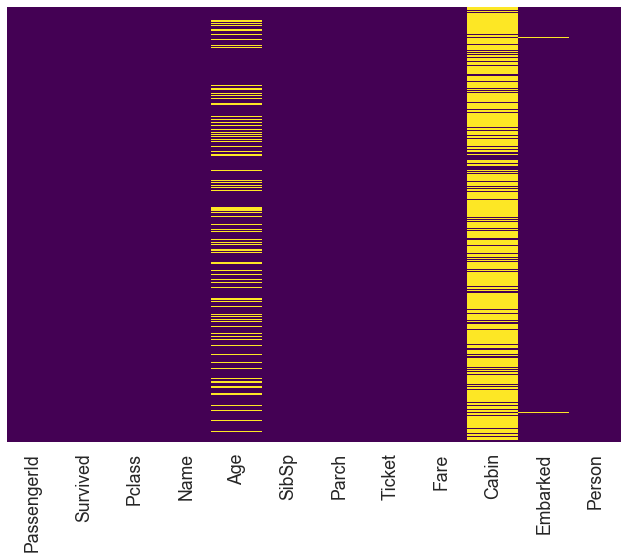

In [11]:
sns.set_context('poster',font_scale=1.1)
plt.figure(figsize=(11,8))
sns.set_context(font_scale=1.3)
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

    Λείπουν 177 καταχωρήσεις στην κατηγορία της ηλικίας, 687 καταχωρήσεις στην κατηγοράις της καμπίνας και μόλις 2 καταχωρήσεις στην κατηγορία του λιμανιού επιβίβασης. 
    Θα καλύψουμε τα κενά αυτά, ψάχνοντας την μέση ηλικία ανδρών-γυναικών-παιδιών ξεχωριστά και με τα νούμερα που θα βρούμε, θα γεμίσουμε τα κενά αυτά.

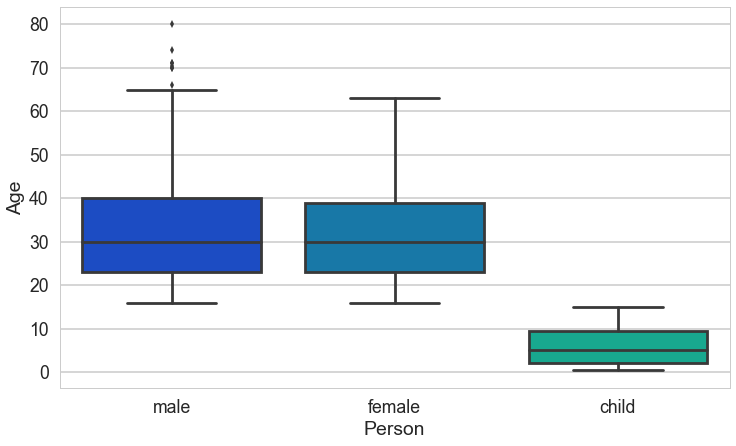

In [123]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Person',y='Age',data=train_df,palette='winter')

In [143]:
print("Ο μέσος όρος ηλικίας των παιδιών ήταν: ",train_df.loc[train_df['Person'] == "child", 'Age'].mean())
print("Ο μέσος όρος ηλικίας των ανδρών ήταν: ",train_df.loc[train_df['Person'] == "male", 'Age'].mean())
print("Ο μέσος όρος ηλικίας των γυναικών ήταν: ", train_df.loc[train_df['Person'] == "female", 'Age'].mean())

Ο μέσος όρος ηλικίας των παιδιών ήταν:  6.369518072289157
Ο μέσος όρος ηλικίας των ανδρών ήταν:  33.13314711359404
Ο μέσος όρος ηλικίας των γυναικών ήταν:  32.0


Έχοντας γνώση του μέσου όρου ηλικίας ανδρών, γυναικών και παιδιών, θα δημιουργήσουμε συνάρτηση έτσι ώστε να συμπληρώσουμε όλα τα κενά. Όλα τα κενά παιδιά των παιδιών θα λάβουν την ηλικία των 6, των ανδρών 33 και των γυναικών 32.

In [144]:
def age(cols):
    Age = cols[0]
    Person = cols[1]
    
    if pd.isnull(Age):

        if Person == "child":
            return 6

        elif Person == "male":
            return 33

        else:
            return 32

    else:
        return Age

In [145]:
train_df['Age'] = train_df[['Age','Person']].apply(age,axis=1)

             ###### ΕΛΕΓΧΟΣ ΞΑΝΑ ΜΕ HEATMAP ΓΙΑ ΝΑ ΕΠΙΒΕΒΑΙΩΣΟΥΜΕ ΟΤΙ ΤΑ ΚΕΝΑ ΣΥΜΠΛΗΡΩΘΗΚΑΝ #########

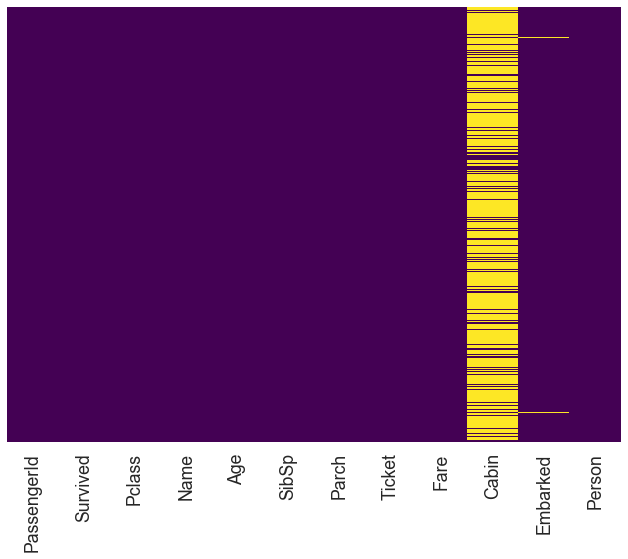

In [146]:
sns.set_context('poster',font_scale=1.1)
plt.figure(figsize=(11,8))
sns.set_context(font_scale=1.3)
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

    Η στήλη cabin έχει πάρα πολλά κενά, οπότε δεν έχει κάποια ιδιαίτερη αξία για εμάς. Οπότε, θα την σβήσουμε εντελώς. Επίσης θα διαγράψουμε και τις 2 κενές καταχωρήσεις που έχουν περισσέψει στην στήλη επιβίβασης.

In [157]:
train_df.drop('Cabin',axis=1,inplace=True)
train_df.dropna(inplace=True)

ValueError: labels ['Cabin'] not contained in axis

                                ###### ΕΠΙΒΕΒΑΙΩΣΗ ΟΤΙ ΔΕΝ ΛΕΙΠΟΥΝ ΑΛΛΑ ΣΤΟΙΧΕΙΑ ########

In [158]:
print(train_df.isnull().sum())
print('-'*50)
print('Συνολικά λείπουν: ',train_df.isnull().sum().sum(),' καταχωρήσεις')
print('-'*50)

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Person         0
dtype: int64
--------------------------------------------------
Συνολικά λείπουν:  0  καταχωρήσεις
--------------------------------------------------


                                 Μία γρήγορη ματιά στο Dataset
                                      ΑΡΙΘΜΟΙ-ΔΙΑΓΡΑΜΜΑΤΑ

                                ###### ΣΥΝΟΛΙΚΟΣ ΑΡΙΘΜΟΣ ΕΠΙΒΑΤΩΝ #######

In [12]:
print('Ο συνολικός αριθμός των επιβατών είναι:',len(list(train_df['PassengerId'])))

Ο συνολικός αριθμός των επιβατών είναι: 891


                                ###### ΜΕΣΟΣ ΟΡΟΣ ΗΛΙΚΙΑΣ ΕΠΙΒΑΤΩΝ #######

In [159]:
print('O μέσος όρος ηλικίας των επιβατών είναι:', train_df['Age'].mean())

O μέσος όρος ηλικίας των επιβατών είναι: 30.251034870641167


                                ######## ΜΕΣΟΣ ΟΡΟΣ ΕΙΣΙΤΗΡΙΟΥ #########

In [160]:
print('O μέσος όρος εισιτηρίου ήταν:', train_df['Fare'].mean())

O μέσος όρος εισιτηρίου ήταν: 32.09668087739029


                                ######## ΕΠΙΒΑΤΕΣ ΠΟΥ ΣΩΘΗΚΑΝ #######

In [161]:
print(train_df.groupby(['Survived']).size())

Survived
0    549
1    340
dtype: int64


plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=1.3)
ax = sns.pointplot(x=sorted(train_df.Survived.unique()), y = train_df.groupby(['Survived']).size(),
              scale=0.5)
ax.axes.set_title("Survivors",fontsize=20)
ax.set_xlabel("Survived",fontsize=20)
ax.set_ylabel("Total",fontsize=20)

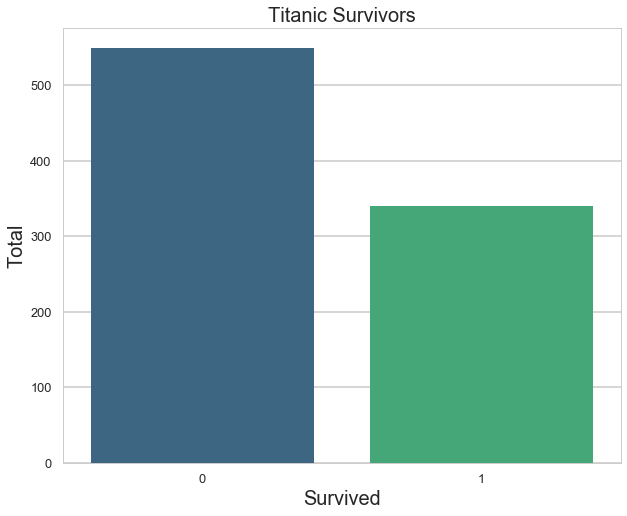

In [162]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
ax = sns.countplot(x='Survived',data=train_df,palette='viridis')
ax.axes.set_title("Titanic Survivors",fontsize=20)
ax.set_xlabel("Survived",fontsize=20)
ax.set_ylabel("Total",fontsize=20)

                                ######## ΕΠΙΒΑΤΕΣ ΑΝΑ ΚΛΑΣΗ ########

In [163]:
print(train_df.groupby(['Pclass']).size())

Pclass
1    214
2    184
3    491
dtype: int64


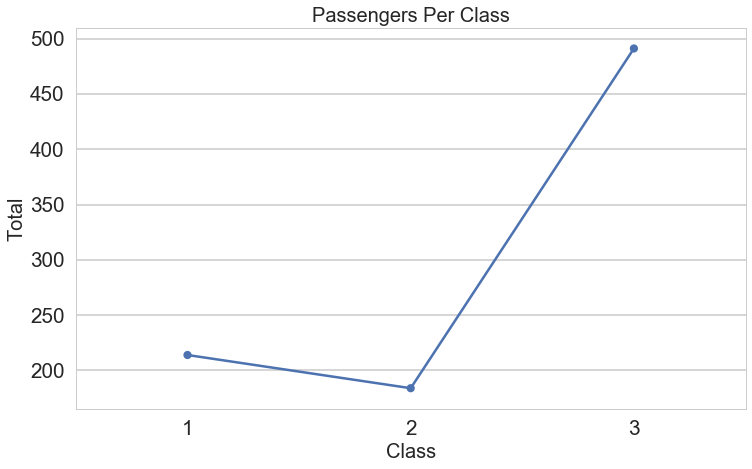

In [164]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=1.3)
ax = sns.pointplot(x=sorted(train_df.Pclass.unique()), y = train_df.groupby(['Pclass']).size(),
              scale=0.5)
ax.axes.set_title("Passengers Per Class",fontsize=20)
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Total",fontsize=20)

                                ######## ΕΠΙΒΑΤΕΣ ΑΝΑ ΦΥΛΛΟ ########

In [165]:
print(train_df.groupby(['Person']).size())

Person
child      83
female    269
male      537
dtype: int64


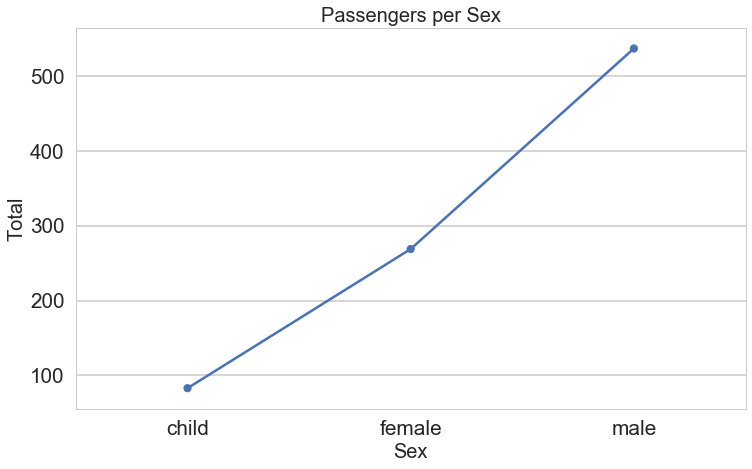

In [166]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=1.3)
ax = sns.pointplot(x=sorted(train_df.Person.unique()), y = train_df.groupby(['Person']).size(),
              scale=0.5)
ax.axes.set_title("Passengers per Sex",fontsize=20)
ax.set_xlabel("Sex",fontsize=20)
ax.set_ylabel("Total",fontsize=20)

                                ######### ΕΠΙΒΑΤΕΣ ΑΝΑ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ######

In [167]:
print(train_df.groupby(['Embarked']).size())

Embarked
C    168
Q     77
S    644
dtype: int64


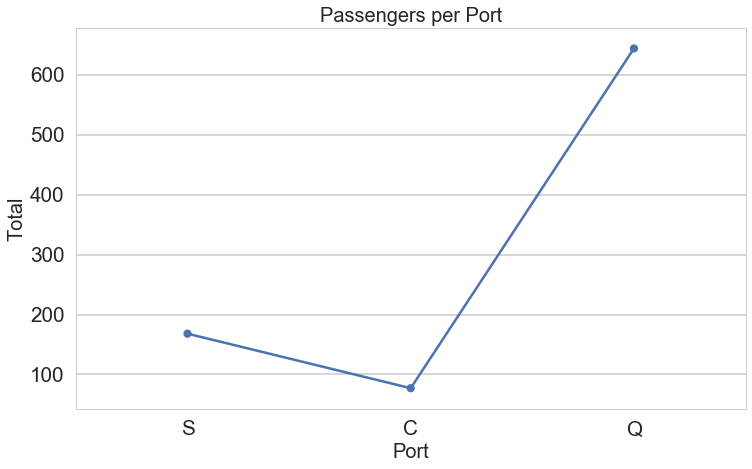

In [168]:
x = train_df.Embarked.unique()
x = x[~pd.isnull(x)]

plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=1.3)
ax = sns.pointplot (x, y = train_df.groupby(['Embarked']).size(),
              scale=0.5)
ax.axes.set_title("Passengers per Port",fontsize=20)
ax.set_xlabel("Port",fontsize=20)
ax.set_ylabel("Total",fontsize=20)

                                  ####### ΣΥΝΟΛΟ ΕΠΙΒΑΤΩΝ ΑΝΑ ΗΛΙΚΙΑ #########

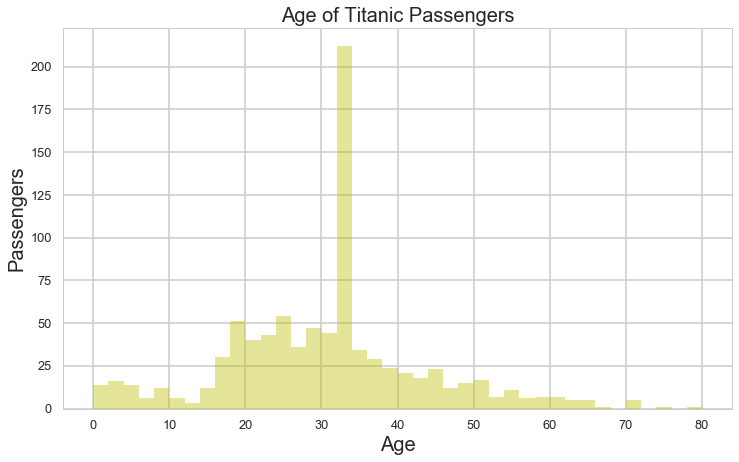

In [169]:
#train_df['Age'].hist(bins=40,color='darkred',alpha=0.7)
x = train_df['Age'].dropna()

bins = np.arange(0, 82, 2)
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
ax = sns.distplot(x, kde=False, bins = bins, color = 'y')
ax.axes.set_title("Age of Titanic Passengers",fontsize=20)
ax.set_xlabel("Age",fontsize=20)
ax.set_ylabel("Passengers",fontsize=20)

#plt.savefig('Age.png')

                                ###### ΚΟΣΤΟΣ ΕΙΣΙΤΗΡΙΟΥ ΑΝΑ ΚΛΑΣΗ ######

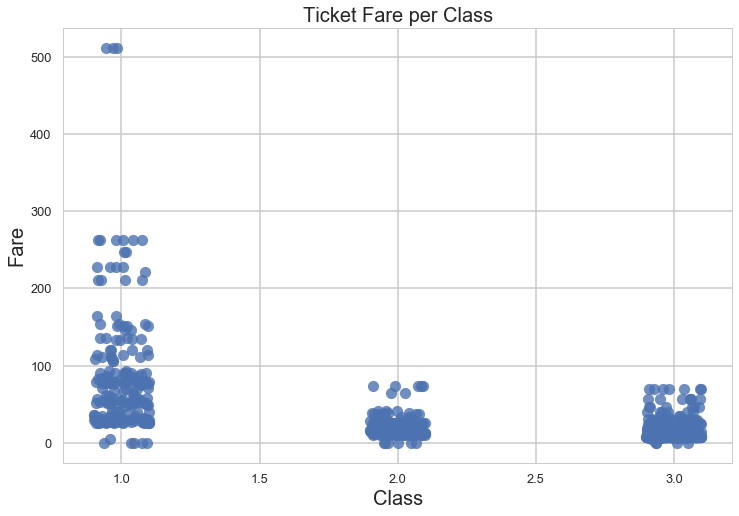

In [170]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
ax = sns.regplot(x="Pclass", y="Fare", data=train_df, x_jitter=.1, fit_reg=False)
ax.axes.set_title("Ticket Fare per Class",fontsize=20)
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Fare",fontsize=20)

                                        ##### ΗΛΙΚΙΑ ΑΝΑ ΚΛΑΣΗ ######

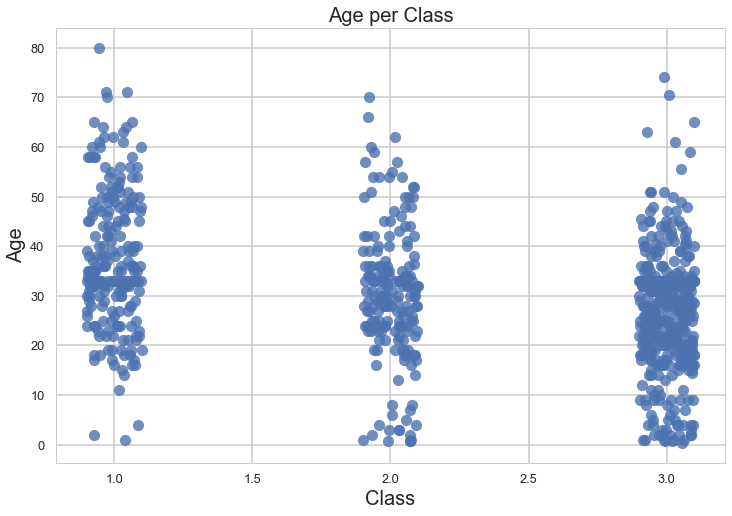

In [171]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
ax = sns.regplot(x="Pclass", y="Age", data=train_df, x_jitter=.1, fit_reg=False)
ax.axes.set_title("Age per Class",fontsize=20)
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Age",fontsize=20)

                                   ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΣΤΑΤΙΣΤΙΚΑ ΣΤΟΙΧΕΙΑ
                                            ΚΑΙ ΔΙΑΓΡΑΜΜΑΤΑ

                            ####### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΚΛΑΣΗ ########

In [172]:
print (train_df[['Pclass', 'Survived']].groupby(['Pclass'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
a = train_df[["Pclass", "Survived"]].groupby(['Pclass'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
a['Percentage']= a['Survived']/a['Survived'].sum()
print(a)

   Pclass  Survived
0       1      0.63
1       2      0.47
2       3      0.24
----------------------------------------------------------------------------------------------------
   Pclass  Survived  Percentage
0       1       134        0.39
2       3       119        0.35
1       2        87        0.26


                         ΤΟ 62% ΤΩΝ ΕΠΙΒΑΤΩΝ ΤΗΣ ΠΡΩΤΗΣ ΚΛΑΣΗΣ ΕΠΙΒΙΩΣΕ
                         ΤΟ 47% ΤΩΝ ΕΠΙΒΑΤΩΝ ΤΗΣ ΔΕΥΤΕΡΗΣ ΚΛΑΣΗΣ ΕΠΙΒΙΩΣΕ
                         ΤΟ 24% ΤΩΝ ΕΠΙΒΑΤΩΝ ΤΗΣ ΤΡΙΤΗΣ ΚΛΑΣΗΣ ΕΠΙΒΙΩΣΕ

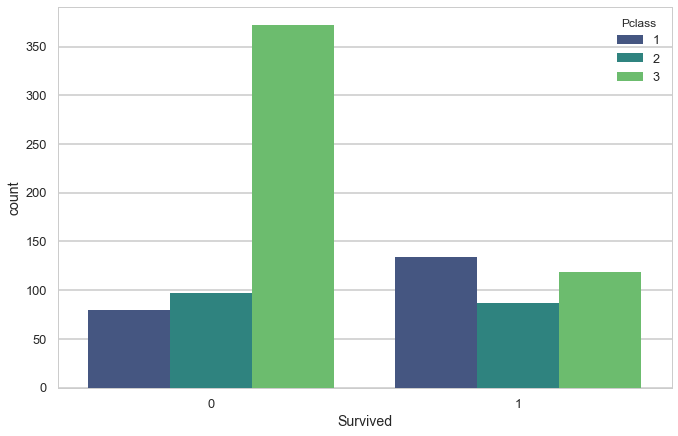

In [173]:
plt.figure(figsize=(11,7))
sns.set_context(font_scale=1.3)
sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='viridis')

                            ######### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΦΥΛΛΟ ########

                                ΤΟ 75% ΤΩΝ ΓΥΝΑΙΚΩΝ ΕΠΙΒΙΩΣΕ
                                ΤΟ 59% ΤΩΝ ΠΑΙΔΙΩΝ ΕΠΙΒΙΩΣΕ
                                ΤΟ 16% ΤΩΝ ΑΝΤΡΩΝ ΕΠΙΒΙΩΣΕ

In [174]:
print (train_df[['Person', 'Survived']].groupby(['Person'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
b = train_df[["Person", "Survived"]].groupby(['Person'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
b['Percentage']= b['Survived']/b['Survived'].sum()
print(b)

   Person  Survived
1  female      0.75
0   child      0.59
2    male      0.16
----------------------------------------------------------------------------------------------------
   Person  Survived  Percentage
1  female       203        0.60
2    male        88        0.26
0   child        49        0.14


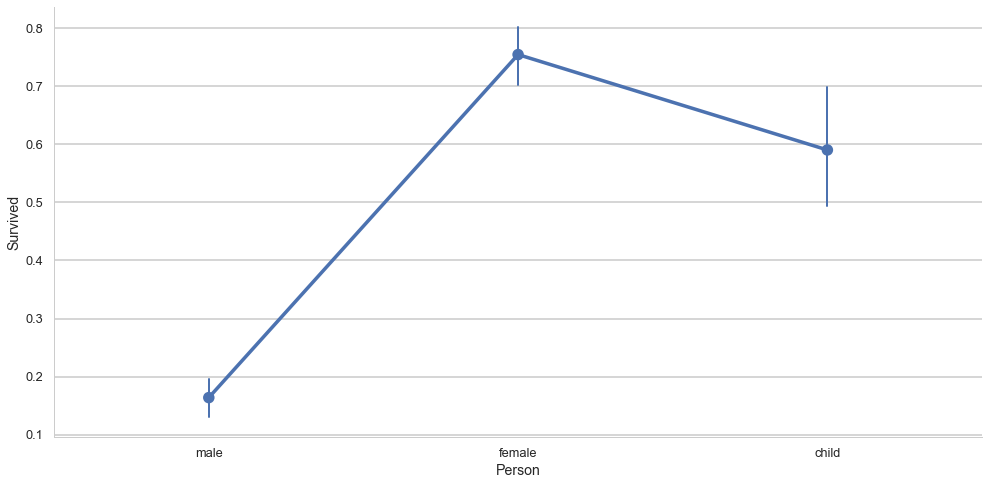

In [175]:
sns.factorplot('Person','Survived', data=train_df,size=7,aspect=2, 
               errwidth = 2, scale = 0.7)

                        ###### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ #######

In [176]:
print (train_df[['Embarked', 'Survived']].groupby(['Embarked'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
c = train_df[["Embarked", "Survived"]].groupby(['Embarked'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
c['Percentage']= c['Survived']/c['Survived'].sum()
print(c)

  Embarked  Survived
0        C      0.55
1        Q      0.39
2        S      0.34
----------------------------------------------------------------------------------------------------
  Embarked  Survived  Percentage
2        S       217        0.64
0        C        93        0.27
1        Q        30        0.09


                            ΤΟ 65% ΟΣΩΝ ΕΠΙΒΙΒΑΣΘΗΚΑΝ ΣΤΟ C ΕΠΙΒΙΩΣΕ
                            ΤΟ 38% ΟΣΩΝ ΕΠΙΒΙΒΑΣΘΗΚΑΝ ΣΤΟ Q ΕΠΙΒΙΩΣΕ
                            ΤΟ 33% ΟΣΩΝ ΕΠΙΒΙΒΑΣΘΗΚΑΝ ΣΤΟ SOUTHAMPTON ΕΠΙΒΙΩΣΕ

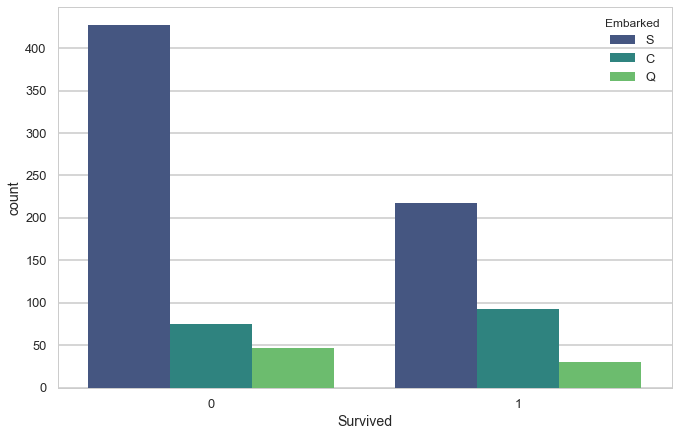

In [177]:
plt.figure(figsize=(11,7))
sns.set_context(font_scale=1.3)
sns.countplot(x='Survived',hue='Embarked',data=train_df,palette='viridis')

                        ##### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΜΕ ΒΑΣΗ ΤΗΝ ΗΛΙΚΙΑ ##########

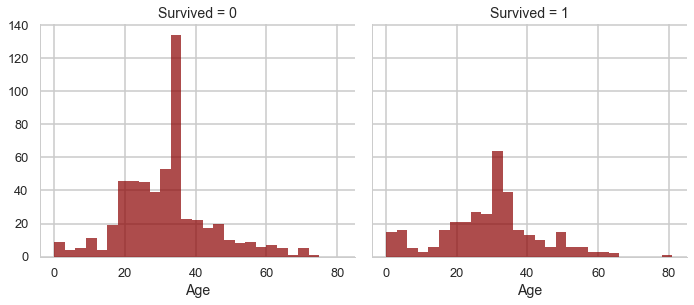

In [178]:
bins = np.arange(0, 82, 3)
g = sns.FacetGrid(train_df, col="Survived", size=4.5, aspect=1.1)
g = g.map(plt.hist, "Age", color="darkred", alpha=0.7, bins=bins)
#plt.savefig('Age2.png')

                     ######## ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΜΕ ΒΑΣΗ ΤΗΝ ΤΙΜΗ ΤΟΥ ΕΙΣΙΤΗΡΙΟΥ #######

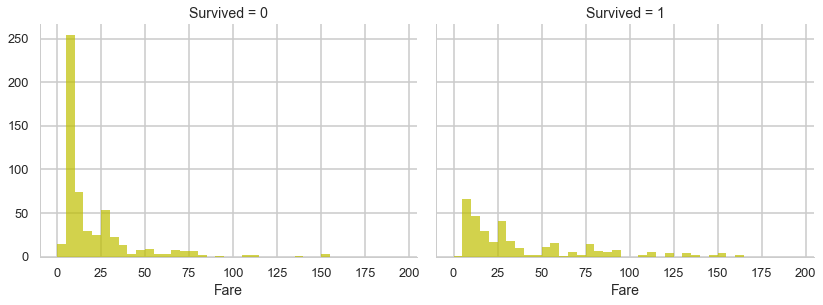

In [179]:
bins = np.arange(0, 200,5)
g = sns.FacetGrid(train_df, col="Survived", size=4.5, aspect=1.3)
g = g.map(plt.hist, "Fare", color="y", alpha=0.7, bins=bins)
#plt.savefig('Age2.png')

                ######## ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΟ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ΚΑΙ ΤΟ ΦΥΛΟ #######

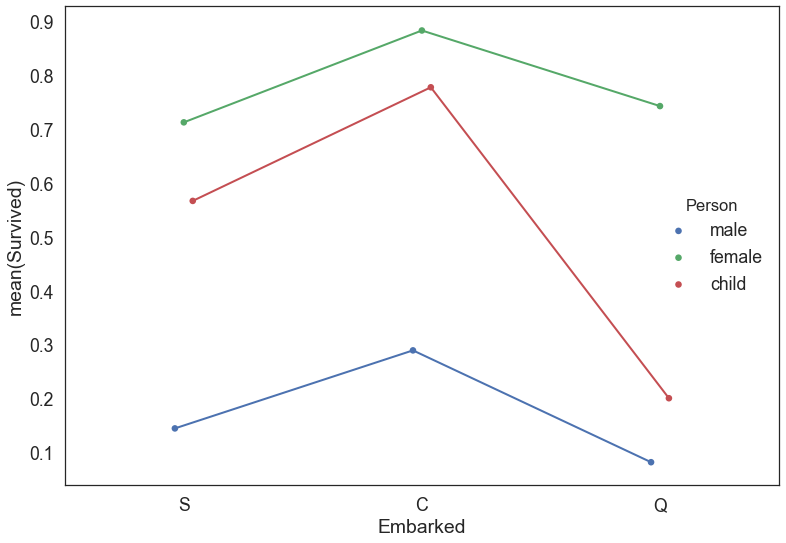

In [180]:
#plt.figure(figsize=(12,8))
sns.set_style('white')
sns.set_context('poster',font_scale=1.1)
ax = sns.pointplot(x="Embarked", y="Survived", hue='Person',
                   data=train_df, dodge=True, scale = 0.4, join=True, ci=None)

                ######## ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΟ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ΚΑΙ ΤΗΝ ΚΛΑΣΗ #######

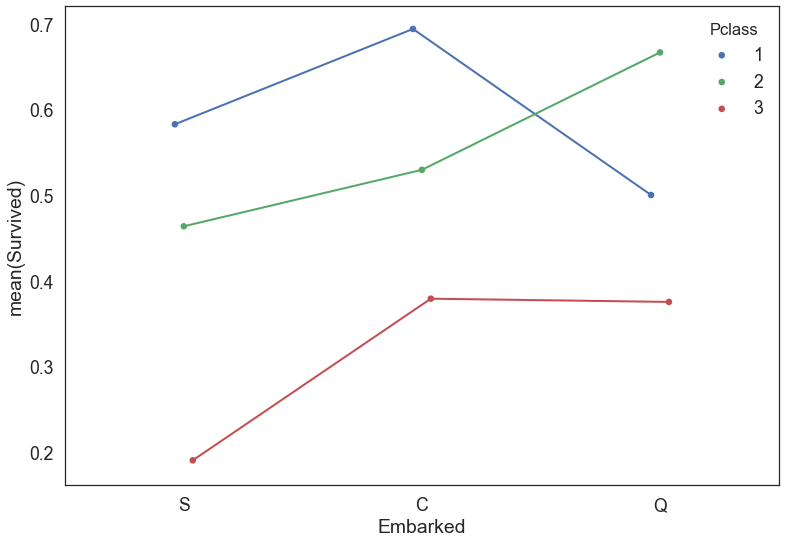

In [181]:
#plt.figure(figsize=(12,8))
sns.set_style('white')
sns.set_context('poster',font_scale=1.1)
ax = sns.pointplot(x="Embarked", y="Survived", hue='Pclass',
                   data=train_df, dodge=True, scale = 0.4, join=True, ci=None)

                ######## ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΗΝ ΚΛΑΣΣΗ ΚΑΙ ΤΗΝ ΗΛΙΚΙΑ #######

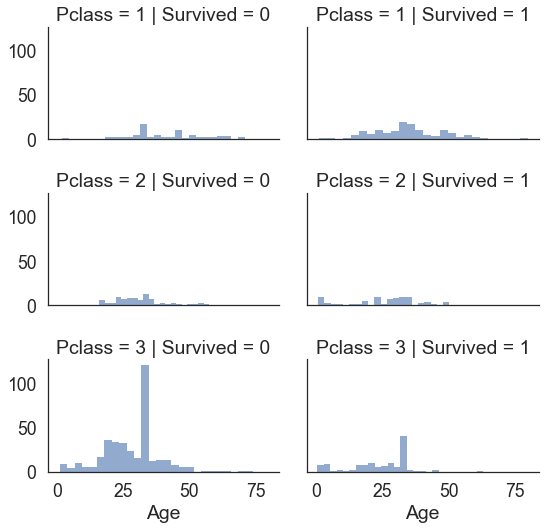

In [182]:
sns.set_style('white')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.6, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.6, bins=26)
grid.add_legend();
#plt.savefig('Age-Class.png')

                         ###### ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΗΝ ΚΛΑΣΗ ΚΑΙ ΤΟ ΦΥΛΛΟ #####

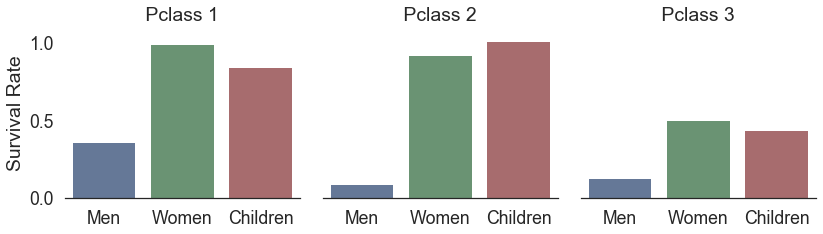

In [183]:
plt.figure(figsize=(11,7))
sns.set_context(font_scale=1.3)
g = sns.factorplot(x="Person", y="Survived", col="Pclass",data=train_df, saturation=.5, kind="bar", ci=None, aspect=1)
(g.set_axis_labels("", "Survival Rate")
.set_xticklabels(["Men", "Women", "Children"])
.set_titles(" {col_var} {col_name} ")
.set(ylim=(0, 1.1))
.despine(left=True)) 

                    ###### TESTING AREA #######

In [151]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Person         0
dtype: int64


In [105]:
print (train_df[['Pclass', 'Survived']].groupby(['Pclass'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
l = train_df[["Pclass", "Survived"]].groupby(['Pclass'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
l['Percentage']= l['Survived']/l['Survived'].sum()
print(a)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------------------------------------------------------------------------------------------------
   Pclass  Survived  Percentage
0       1       136    0.397661
2       3       119    0.347953
1       2        87    0.254386


In [99]:
#g = sns.jointplot("Age", "Fare", data=train_df, kind="hex")

bins = np.arange(0, 280, 3)
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
ax = sns.distplot(train_df['Fare'], kde=False, bins = bins, color = 'y')
#ax.axes.set_title("Age of Titanic Passengers",fontsize=20)
#ax.set_xlabel("Age",fontsize=20)#ax.set_ylabel("Passengers",fontsize=20)

In [38]:
# filter(lambda v: v==v, x)